In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering

In [6]:
# Load the wine dataset
wine_data = pd.read_csv("winequality-red.csv")

In [7]:
# Standardize the features
scaler = StandardScaler()
wine_data_scaled = scaler.fit_transform(wine_data)

In [8]:
# Perform hierarchical agglomerative clustering
linkage_matrix = linkage(wine_data_scaled, method='ward')

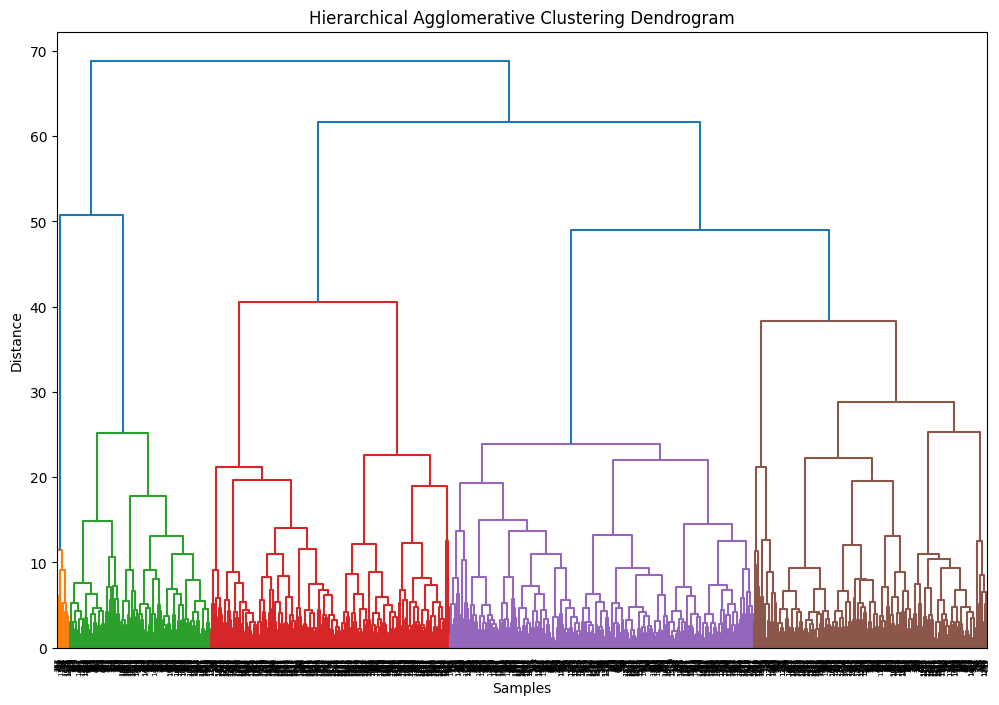

In [9]:
# Visualize the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Agglomerative Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [10]:
# Perform clustering with chosen number of clusters
num_clusters = 3  # Example: selecting 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = agg_clustering.fit_predict(wine_data_scaled)

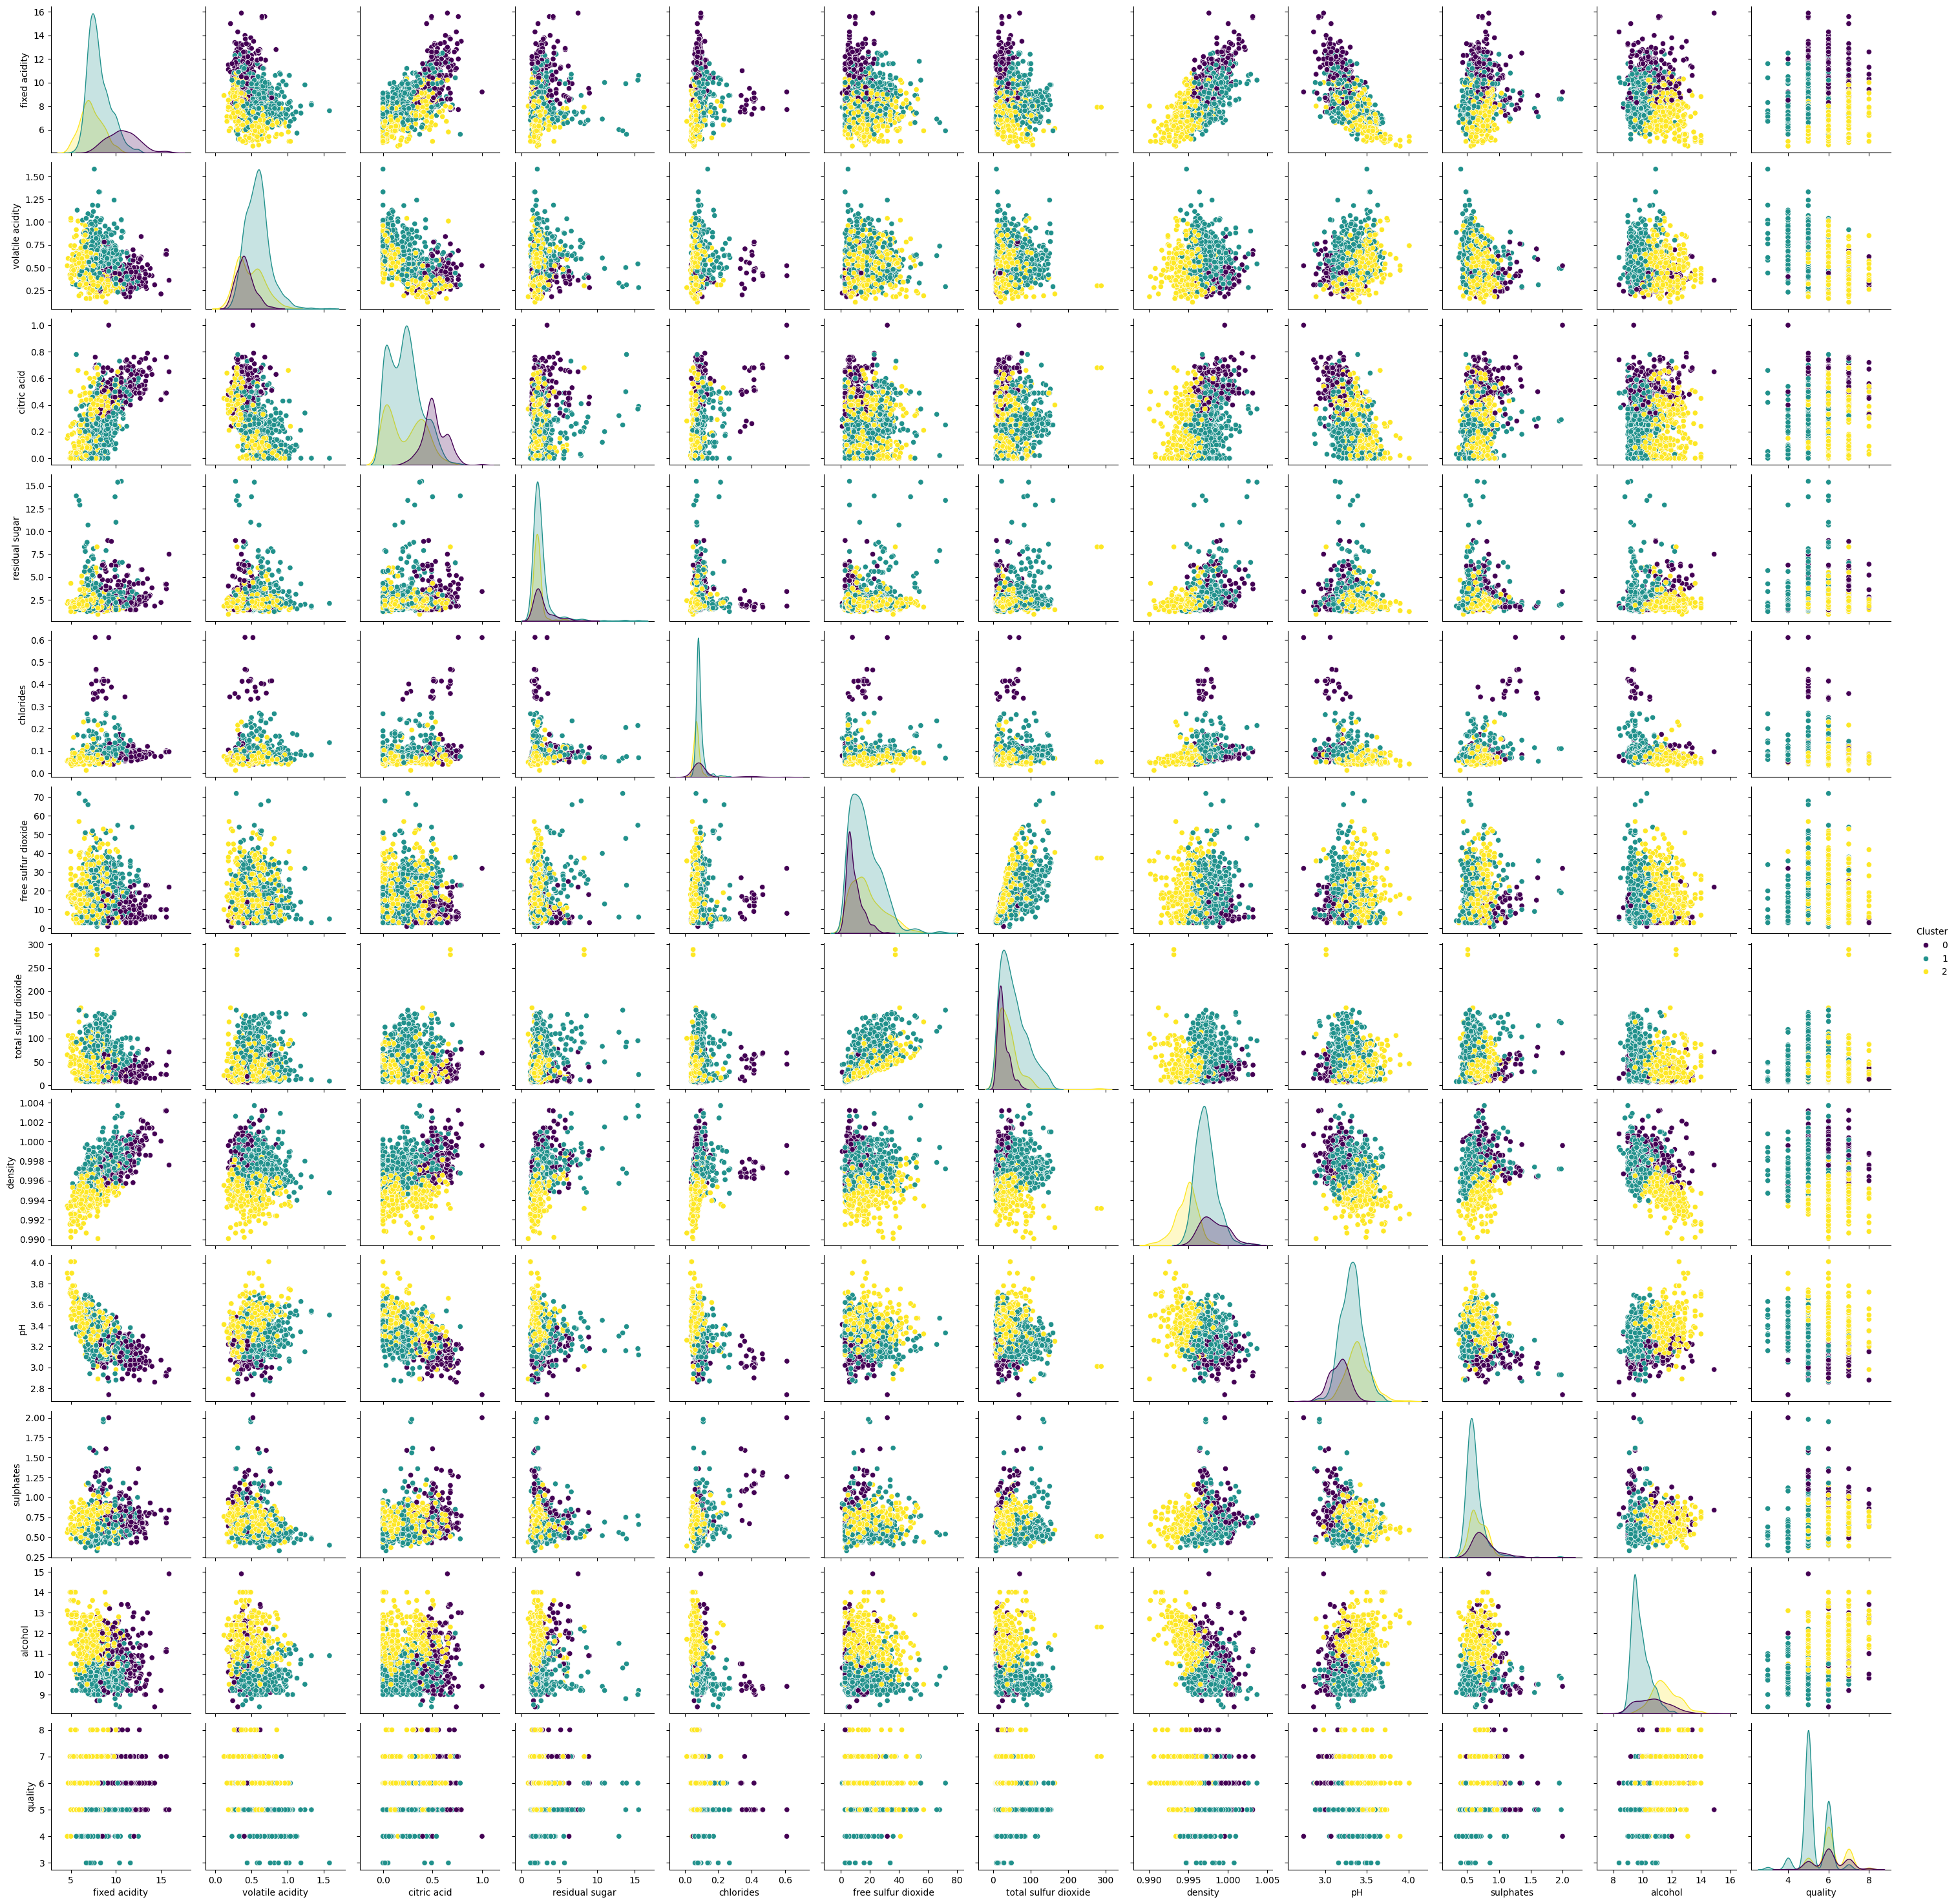

In [11]:
# Visualize clusters with pairplot (you may choose other visualizations)
wine_data_clustered = wine_data.copy()
wine_data_clustered['Cluster'] = cluster_labels
sns.pairplot(wine_data_clustered, hue='Cluster', palette='viridis')
plt.show()

In [12]:
# Evaluate clustering performance
silhouette = silhouette_score(wine_data_scaled, cluster_labels)
davies_bouldin = davies_bouldin_score(wine_data_scaled, cluster_labels)
calinski_harabasz = calinski_harabasz_score(wine_data_scaled, cluster_labels)

In [13]:
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Silhouette Score: 0.1430119832460395
Davies-Bouldin Index: 1.995595347074041
Calinski-Harabasz Index: 228.32502665511112


In [16]:
# Reduce dimensionality using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Choose number of components
wine_data_pca = pca.fit_transform(wine_data_scaled)

In [17]:
# Perform hierarchical agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)  # Example: selecting 3 clusters
cluster_labels = agg_clustering.fit_predict(wine_data_scaled)

In [22]:
# Reduce dimensionality using PCA
pca = PCA(n_components=2)  # Choose number of components
wine_data_pca = pca.fit_transform(wine_data_scaled)

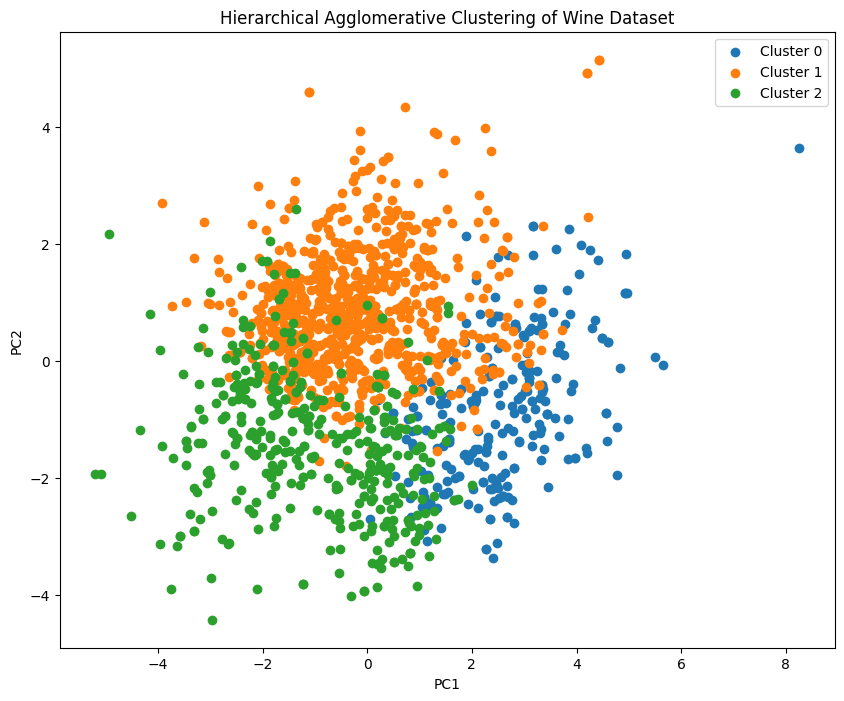

In [23]:
# Plot the clusters
plt.figure(figsize=(10, 8))
for label in np.unique(cluster_labels):
    indices = np.where(cluster_labels == label)
    plt.scatter(wine_data_pca[indices, 0], wine_data_pca[indices, 1], label=f'Cluster {label}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Hierarchical Agglomerative Clustering of Wine Dataset')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [29]:
# Calculate Silhouette Score
silhouette = silhouette_score(wine_data_scaled, cluster_labels)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.1430119832460395


In [30]:
# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(wine_data_scaled, cluster_labels)
print("Davies-Bouldin Index:", davies_bouldin)

Davies-Bouldin Index: 1.995595347074041


In [31]:
# Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(wine_data_scaled, cluster_labels)
print("Calinski-Harabasz Index:", calinski_harabasz)

Calinski-Harabasz Index: 228.32502665511112
